In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [87]:
train_data = pd.read_csv("./data/house-prices-advanced-regression-techniques/train.csv")
# test_data = pd.read_csv("./data/house-prices-advanced-regression-techniques/test.csv")

In [88]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
count = len(train_data)
print (count)

1460


In [90]:
# train_data.count()

In [91]:
# delete_col = df.columns[df.isnull().any()]

# Missing values treatment

In [92]:
all_data_na = (train_data.isnull().sum() / len(train_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(50)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [93]:
y = list(missing_data.index)

In [94]:
col_to_drop = train_data.columns[train_data.isnull().mean() >=0.15]

In [95]:
train_data = train_data.drop(columns=col_to_drop,axis=1)

In [96]:
print (y)
missing_values_cols = list(set(y) - set(col_to_drop))

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical']


In [97]:
len(missing_values_cols)

13

In [98]:
print (missing_values_cols)

['BsmtFinType2', 'BsmtQual', 'MasVnrArea', 'Electrical', 'GarageType', 'GarageYrBlt', 'BsmtExposure', 'MasVnrType', 'BsmtCond', 'GarageCond', 'GarageFinish', 'BsmtFinType1', 'GarageQual']


In [195]:
# for i in missing_values_cols:
#     print (i,train_data[i].head(1),"\n")

In [100]:
missing_values_cols_float = ['GarageYrBlt','MasVnrArea']

In [101]:
missing_values_cols = list(set(missing_values_cols) - set(missing_values_cols_float))

In [196]:
# train_data[missing_values_cols].info()

In [104]:
for i in missing_values_cols:
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

In [106]:
for i in missing_values_cols_float:
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

In [107]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [194]:
train_data[missing_values_cols_float[0]].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [114]:
# train_data[missing_values_cols_float[0]].mode()

In [121]:
allcols = list(train_data.keys())

In [126]:
encodingcols = []

In [127]:
for i in allcols:
    if (type(train_data[i][0]) == str):
        encodingcols.append(i)

In [128]:
len(encodingcols)

38

# Label Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in encodingcols:
    train_data[i]      = labelencoder_X.fit_transform(train_data[i])

In [131]:
train_label = train_data['SalePrice']

In [132]:
train_data = train_data.drop(columns=['SalePrice'],axis=1)

In [133]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size = 0.3, random_state = 101)

In [136]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [139]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge
import sklearn.model_selection as ms


In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Linear Regression

In [185]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 5430665699122194.0
RMSE on Test set : 2063573405357488.0


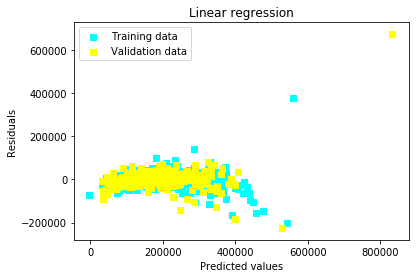

In [193]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "cyan", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "best")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

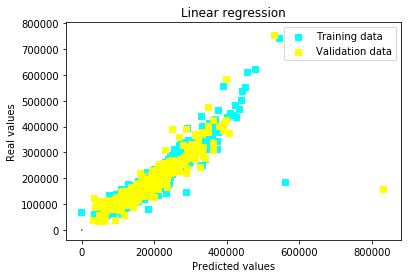

In [192]:
# Plot predictions
plt.scatter(y_train_pred, y_train, c = "cyan", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "best")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Ridge

In [182]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 11)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 30180.78688999608
Ridge RMSE on Test set : 42161.32614681646


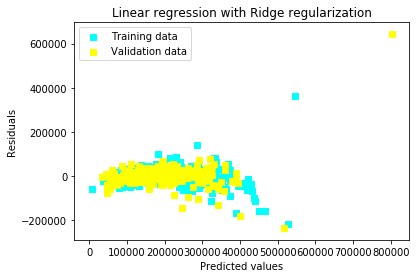

In [191]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "cyan", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "best")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

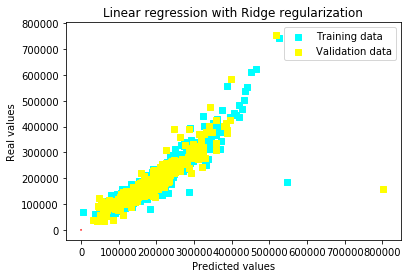

In [190]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "cyan", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "best")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Lasso

In [179]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 11)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 1.4
Lasso RMSE on Training set : 30829.911483799446
Lasso RMSE on Test set : 53984.1307400706


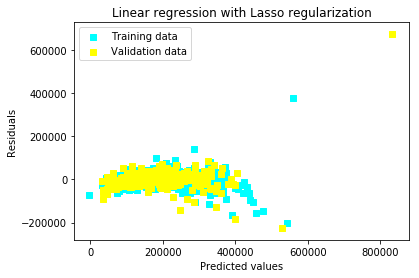

In [188]:
# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "cyan", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "best")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

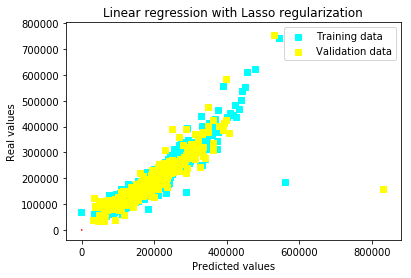

In [189]:
# Plot predictions
plt.scatter(y_train_las, y_train, c = "cyan", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "best")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()